In [35]:
import pprint
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
import pandas as pd


In [32]:
""" 
해당 클래스는 
spotipy에 함수의 아이디 비번을 설정하는 함수 (=__init__(self)),
트랙 정보 기반, 감정과 관련된 정보들을 가지고 오는 함수 (=spe_get_feature())
트랙 정보 기반, 모든 정보를 가지고 오는 함수 (= all_get_feature())
를 포함하는 spotipy api 기반의 클래스입니다.
"""

class Spotify_audio_features:
    def __init__(self):
        # 초기 설정
        cid = '7ae275c4289c4961aa84d3944ea547ff'
        secret = '06cbce79bb0f474aae909c57e6001f45'

        # 함수의 아이디와 비번을 설정하는 작업
        client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
        self.sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    
    # 트랙 정보를 기반으로, 감정 기반의 정보들만 가져오는 함수
    def get_features(self, song):
        # 트랙 정보를 입력하기
        track_info = self.sp.search(q=song, type='track', market='JP') # 여기서 q는 노래명을 입력, type은 track으로 진행
        track_id = track_info["tracks"]["items"][0]["id"]

        # 해당 노래의 특징을 가지고 오기
        features = self.sp.audio_features(tracks=[track_id])
        acousticness = features[0]["acousticness"]
        danceability = features[0]["danceability"]  # 춤추기에 적합한 노래일 수록 값이 높음
        energy = features[0]["energy"]      # 빠르고 화려하고 노이즈가 많은 음악
        liveness = features[0]["liveness"]
        loudness = features[0]["loudness"]  # 음악의 밝음 정도
        valence = features[0]["valence"]
        mode = features[0]["mode"]

        result = {"acousticness" : acousticness,
                    "danceability" : danceability,
                    "energy" : energy,
                    "liveness" : liveness,
                    "loudness" : loudness,
                    "valence" : valence,
                    "mode" : mode}

        return result
    
    # 트랙 정보를 기반으로, 곡의 전체 정보를 가지고 오기
    def all_get_features(self, song):
        # 트랙 정보를 입력하기
        track_info = self.sp.search(q=song, type='track', market='JP') # 여기서 q는 노래명을 입력, type은 track으로 진행
        track_id = track_info["tracks"]["items"][0]["id"]

        # 해당 노래의 특징을 가지고 오기
        features = self.sp.audio_features(tracks=[track_id])[0]  # 첫 번째 트랙의 특징만 가져오기

        return features


In [34]:
""" 얻은 데이터를 출력 및 데이터 파일로 생성합니다. """

# 사용자가 입력한 여러 곡
song_titles = ["dynamite", "shape of you", "blinding lights"]

# Spotify_audio_features 클래스 인스턴스 생성
saf = Spotify_audio_features()

# 곡 정보와 특징들을 저장할 빈 리스트 생성
data_list = []

# 각 곡의 정보와 특징을 가져와서 리스트에 추가
for song_title in song_titles:
    # 각 곡의 정보 및 특징 가져오기
    song_info = {"song_title": song_title}
    feat = saf.all_get_features(song_title)
    song_info.update(feat)
    data_list.append(song_info)

# 리스트를 데이터프레임으로 변환
df = pd.DataFrame(data_list)

# 리스트 형식으로 출력
print("=== 곡의 정보 및 특징 데이터 ===")
for idx, row in df.iterrows():
    print(f"곡: {row['song_title']}")
    pprint.pprint(row)
    print("=====================")

# 데이터프레임을 엑셀 파일로 저장
df.to_excel("spotify_audio_features.xlsx", index=False)



=== 곡의 정보 및 특징 데이터 ===
곡: dynamite
song_title                                                   dynamite
danceability                                                    0.751
energy                                                          0.781
key                                                                 4
loudness                                                       -3.724
mode                                                                1
speechiness                                                    0.0862
acousticness                                                   0.0039
instrumentalness                                                  0.0
liveness                                                        0.036
valence                                                         0.814
tempo                                                         119.977
type                                                   audio_features
id                                             2CEgGE6a

In [29]:
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import time

client_id = '7ae275c4289c4961aa84d3944ea547ff'
client_secret = '06cbce79bb0f474aae909c57e6001f45'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# 주어진 아티스트 URI 리스트
artist_uris = [
    'spotify:artist:41MozSoPIsD1dJM0CLPjZF', 'spotify:artist:7n2Ycct7Beij7Dj7meI4X0', 'spotify:artist:1z4g3DjTBBZKhvAroFlhOM', 
    'spotify:artist:6HvZYsbFfjnjFrWF950C9d', 'spotify:artist:6RHTUrRF63xao58xh9FXYJ', 'spotify:artist:4SpbR6yFEvexJuaBpgAU5p', 
    'spotify:artist:6YVMFz59CuY7ngCxTxjpxE', 'spotify:artist:2AfmfGFbe0A0WsTYm0SDTx', 'spotify:artist:28ot3wh4oNmoFOdVajibBl', 
    'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX', 'spotify:artist:2dIgFjalVxs4ThymZ67YCE', 'spotify:artist:7nqOGRxlXj7N2JYbgNEjYH', 
    'spotify:artist:5t5FqBwTcgKTaWmfEbwQY9', 'spotify:artist:1gBUSTR3TyDdTVFIaQnc02', 'spotify:artist:3cjEqqelV9zb4BYE3qDQ4O', 
    'spotify:artist:4Kxlr1PRlDKEB0ekOCyHgX'
]

# 결과를 저장할 리스트 초기화
all_track_names = []
all_artist_names = []
all_artist_ids = []
all_cover_arts = []
all_preview_urls = []

# 각 아티스트 URI에 대해 상위 10개의 곡을 가져와서 결과 리스트에 추가
for artist_uri in artist_uris:
    results = sp.artist_top_tracks(artist_uri)
    for track in results['tracks'][:10]:
        all_track_names.append(track['name'])
        all_artist_names.append(track['artists'][0]['name'])
        all_artist_ids.append(artist_uri.split(':')[-1])
        all_cover_arts.append(track['album']['images'][0]['url'])
        all_preview_urls.append(track['preview_url'])
        # API 요청 사이에 1초 딜레이 추가
        time.sleep(1)

# 결과를 데이터프레임으로 변환
df = pd.DataFrame({
    'Track Name': all_track_names,
    'Artist Name': all_artist_names,
    'Artist ID': all_artist_ids,
    'Cover Art': all_cover_arts,
    'Preview URL': all_preview_urls
})

# 데이터프레임 출력
print(df.head())


=== 곡의 특징 데이터 ===


KeyError: 'title'

       song  danceability  energy  valence
0  dynamite         0.751   0.781    0.814
3
[0.0, 2.0943951023931953, 4.1887902047863905, 0.0]
0
song            dynamite
danceability       0.751
energy             0.781
valence            0.814
Name: 0, dtype: object
[0.751, 0.781, 0.814, 0.751]


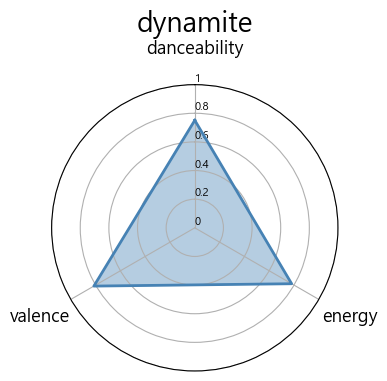

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import pi
from matplotlib import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from pandas.core import frame


saf = Spotify_audio_features()
song_title = "dynamite"

feat = saf.get_features(song_title)
df = pd.DataFrame({
    'song': [song_title],
    'danceability': [feat['danceability']],
    'energy': [feat['energy']],
    'valence': [feat['valence']]
})
print(df)

matplotlib.rc('font', family='malgun gothic')
labels = df.columns[1:]
num_labels = len(labels)
print(num_labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
print(angles)

# color depending on the mode (major or minor)
if feat['mode'] == 1: color = "steelblue"
else: color = "mediumseagreen"

fig = plt.figure(figsize=(5,5)) # Window size, figsize-tuple x 100 pixel...
fig.set_facecolor('white') # background color

for i, row in df.iterrows():
    print(i)
    print(row)
    data = df.iloc[i].drop('song').tolist()
    data += data[:1]
    print(data)

    # generate graphs
    ax = plt.subplot(1,1,i+1, polar=True) #args : nrows, ncols, index, **kwargs
    ax.set_theta_offset(pi / 2) 
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)

    ax.set_rlabel_position(0)
    plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0','0.2','0.4','0.6','0.8','1'], fontsize=8)
    plt.ylim(0,1)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, data, color=color, alpha=0.4)

    plt.title(row.song, size=20)

plt.tight_layout(pad=5)
plt.show()